In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

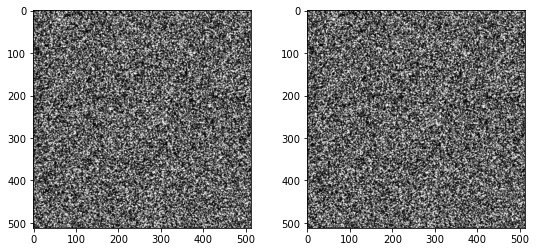

In [2]:
a = imread("B001_1.tif")
b = imread("B001_2.tif")

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].imshow(a, cmap=plt.cm.gray)
axs[1].imshow(b, cmap=plt.cm.gray)
plt.show()

Cross Correlation manually 

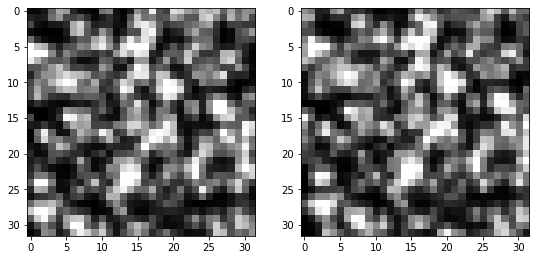

In [3]:
win_size = 32

a_win= a[:win_size, :win_size].copy()
b_win= b[:win_size, :win_size].copy()

fig, axs = plt.subplots(1, 2, figsize=(9,5))
axs[0].imshow(a_win, cmap=plt.cm.gray)
axs[1].imshow(b_win, cmap=plt.cm.gray)
plt.show()

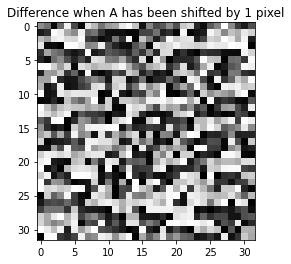

In [4]:
plt.imshow(b_win - np.roll(b_win, (1, 0), axis=(0, 1)), cmap=plt.cm.gray)
plt.title("Difference when A has been shifted by 1 pixel")
plt.show()

In [5]:
from scipy.signal import correlate
cross_corr = correlate(b_win - b_win.mean(), a_win - a_win.mean(), method="fft")
print("Size of the correlation map: %d x %d" % cross_corr.shape)


Size of the correlation map: 63 x 63


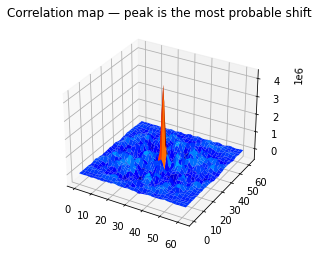

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
Y, X = np.meshgrid(np.arange(cross_corr.shape[0]), np.arange(cross_corr.shape[1]))

ax.plot_surface(Y, X, cross_corr, cmap='jet', linewidth=0.2)  # type: ignore
plt.title("Correlation map — peak is the most probable shift")
plt.show()

y=30, x=32


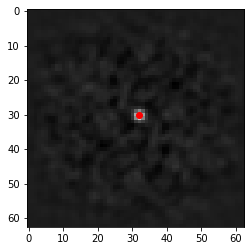

In [7]:
plt.imshow(cross_corr, cmap=plt.cm.gray)

y, x = np.unravel_index(cross_corr.argmax(), cross_corr.shape)
print(f"{y=}, {x=}")

plt.plot(x, y, "ro")
plt.show()

In [18]:
np.unravel_index(np.argmax(cross_corr), cross_corr.shape)-np.array([win_size, win_size])+1

array([-1,  1])

In [25]:
def vel_field(curr_frame, next_frame, win_size):
    ys = np.arange(0, curr_frame.shape[0], win_size)
    xs = np.arange(0, curr_frame.shape[1], win_size)
    dys = np.zeros((len(ys),len(xs)))
    dxs = np.zeros((len(ys),len(xs)))
    for iy, y in enumerate(ys):
        for ix, x in enumerate(xs):
            int_win= curr_frame[y:y+win_size, x:x+win_size]
            search_win= next_frame[y:y+win_size, x:x+win_size]
            cross_corr= correlate(search_win- search_win.mean(), int_win - int_win.mean(), method = "fft")
            dys[iy, ix], dxs[iy, ix] = (np.unravel_index(np.argmax(cross_corr), cross_corr.shape)- np.array([win_size, win_size])+1)
    ys= ys+win_size/2
    xs= xs+win_size/2
    return xs, ys, dxs, dys
        

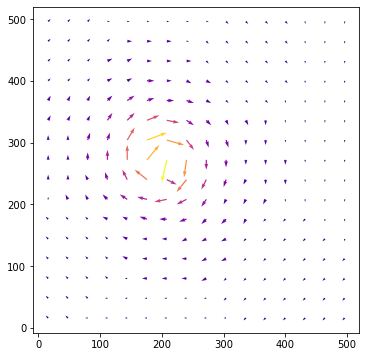

In [26]:
xs, ys, dxs, dys = vel_field(a, b, 32)
norm_drs= np.sqrt(dxs**2 +dys**2)

fig, ax = plt.subplots(figsize=(6,6))
ax.quiver(xs, ys[::-1], dxs, -dys, norm_drs, cmap= "plasma", angles="xy", scale_units="xy", scale=0.25,)
ax.set_aspect("equal")
plt.show()